### Question 1

Isochrone potential:

$$ \Phi(r) = -\frac{GM}{b + \sqrt{b^2 + r^2}} $$

**Considering the small distance limit r<<b**:

Expanding $\Phi(r)$ to second order Taylor series around r=0 (using Mathematica) gives:

![](img/hw2_q1.png)

Simplifying this expression we get

$$ \Phi(r) \approx -\frac{GM}{2b} + \frac{GMr^2}{8b^3} $$

which can be written in terms of constants (with $k=GM/4b^3$ and $c=-GM/2b$):

$$ \Phi(r) \approx \frac{1}{2}kr^2 + c $$

which we observe is the form of a harmonic oscillator potential.

**Considering the large distance limit r>>b**:

To consider the r>>b case, we can take the limit of $\Phi(r)$ as $b/r\rightarrow 0$:

$$ \Phi(r) = -\frac{GM}{\left[\frac{b}{r} + \sqrt{\left(\frac{b}{r}\right)^2 + 1}\right] r} \approx -\frac{GM}{r} $$

which we observe is the form of a point source potential.

### Question 2

In [27]:
from galpy.potential import *
import matplotlib.pyplot as plt
import numpy as np

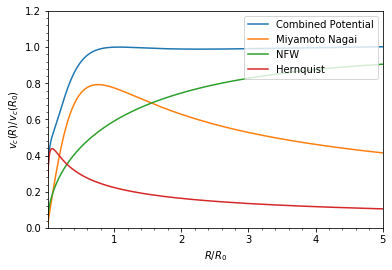

In [29]:
mp = MiyamotoNagaiPotential(a=0.5,b=0.0375,normalize=.6)
fp = NFWPotential(a=4.5,normalize=.35)
hp = HernquistPotential(a=0.6/8,normalize=0.05)
MWPotential = mp + fp + hp

plotRotcurve(MWPotential, label='Combined Potential')
mp.plotRotcurve(Rrange=[0.01,10.], overplot=True, label='Miyamoto Nagai')
fp.plotRotcurve(Rrange=[0.01,10.], overplot=True, label='NFW')
hp.plotRotcurve(Rrange=[0.01,10.], overplot=True, label='Hernquist')
plt.legend(loc='upper right')
plt.show()

For the combined rotation curve, at R=1 (inner region of the galaxy) the dominant contribution to the circular velocity appears to come from the Miyamoto Nagai profile which models the disk, whereas at R=10, the dominant contribution appears to come from the NFW profile which models dark matter. Observations of flat rotation curves for increasing R suggests the presence of dark matter in galaxies.

### Question 3

In [14]:
from galpy.orbit import Orbit

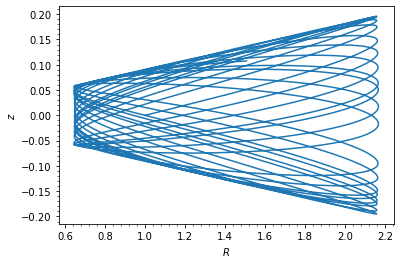

In [38]:
# Initial velocities
R, z = 1, 0
vR, vT, vz = 1, 1.1, 0.1

# Potential
ts = np.linspace(0., 100., 1e4)
ip = IsochronePotential(b=1.0, normalize=True)

# Plot
o = Orbit([R,vR,vT,z,vz])
o.integrate(ts, ip, method='leapfrog')
o.plot();

What are the initial velocities that results in a circular orbit?

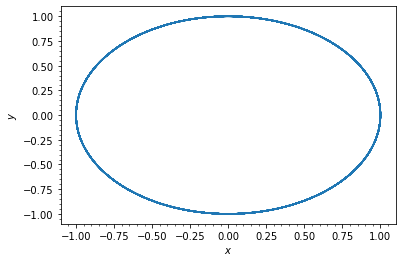

In [48]:
vR, vT, vz = 0, 1, 0
phi = 0

o = Orbit([R,vR,vT,z,vz, phi])
o.integrate(ts, ip, method='leapfrog')
o.plot(d1='x',d2='y');

As long as the tangential velocity is non-zero, but the radial and vertical velocities are zero, the orbit will be circular.